<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TP : Analyse de sentiment des critiques de films provenant d'IMDb (Internet Movie Database)</p>

## Exploration des données (EDA) :

### 1. Importer les bibliothèques nécessaires :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### 2. Charger le jeu de données :

In [2]:
data=pd.read_csv("IMDB Dataset.csv",delimiter=",")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### 3. Visualiser les informations sur le jeu de données :


**Informations générales :**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


**Quelques exemples de critiques :**

In [4]:
positive_reviews = data[data['sentiment'] == 'positive']['review'].head(2).values
negative_reviews = data[data['sentiment'] == 'negative']['review'].head(2).values

print("Quelques exemples de critiques positives :\n")
for review in positive_reviews:
    print(review)
    print('\n' + '-'*50 + '\n')

print("\nQuelques exemples de critiques négatives :\n")
for review in negative_reviews:
    print(review)
    print('\n' + '-'*50 + '\n')

Quelques exemples de critiques positives :

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say t

**Visualiser la distribution des sentiments :**

In [5]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

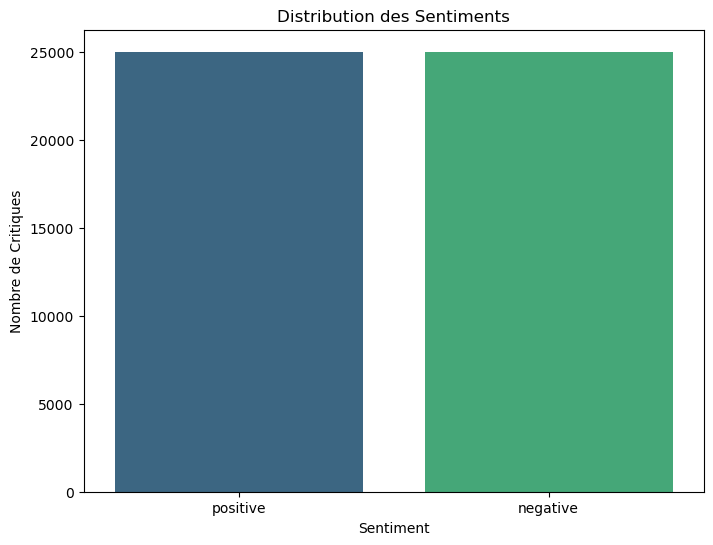

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Critiques')
plt.show()

**Visualiser les mots les plus fréquents dans les critiques positives et négatives :**

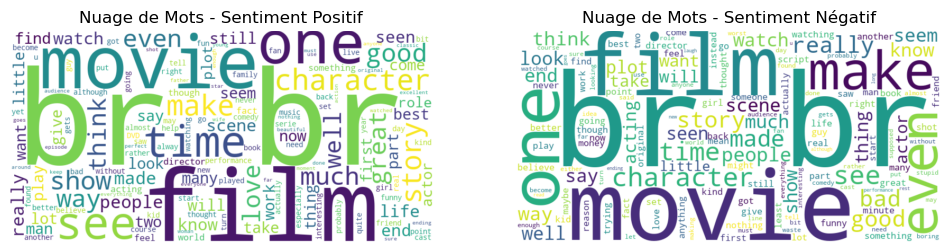

In [7]:
from wordcloud import WordCloud


positive_reviews = data[data['sentiment'] == 'positive']['review'].str.cat(sep=' ')
negative_reviews = data[data['sentiment'] == 'negative']['review'].str.cat(sep=' ')

wordcloud_positive = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Nuage de Mots - Sentiment Positif')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Nuage de Mots - Sentiment Négatif')
plt.axis('off')

plt.show()

## Prétraitement : 

### 1. Nettoyage des Données :

**Supprimer les doublons :**

In [8]:
data.drop_duplicates(inplace=True)

**Suppression des caractères spéciaux et ponctuations et les balises HTML :**

In [9]:
import re

def clean_text(text):
    text = re.sub('<.*?>', '', text)  # Supprission des balises HTML
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprission  des caractères spéciaux \n \t ....
    return text

data['cleaned_review'] = data['review'].apply(clean_text)
data['cleaned_review'][0]

'One of the other reviewers has mentioned that after watching just  Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty picture

### 2. Tokenisation :

__exemple:__ 

`i really love this movie` => `[i, really, love, this, movie]`


In [10]:
from nltk.tokenize import word_tokenize

data['review_tokens'] = data['cleaned_review'].apply(word_tokenize)

### 3. Normalisation et Suppression des Stopwords :

__exemple:__ 

`["i", "really", "love", "THIS", "movie"]` 

=> `["i", "really", "love", "this", "movie"]`

=>`["really", "love", "movie"]`

In [11]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

data['normalized_review'] = data['review_tokens'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])

### 4. Stemming ou Lemmatisation :

__exemple:__ 

`movies`=>`movie`

In [15]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

data['lemmatized_review'] = data['normalized_review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

cols = ['lemmatized_review', 'sentiment']
cleaned_data = data[cols]

cleaned_data.rename(columns={'lemmatized_review': 'review'}, inplace=True)
cleaned_data

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\HP\AppData\Local\Temp\ipykernel_9560\905507229.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.rename(columns={'lemmatized_review': 'review'}, inplace=True)


,review,sentiment
0,"[one, reviewer, mentioned, watching, oz, episo...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, there, family, little, boy, jake, ...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


### 5. Division de données en ensembles d'entraînement et de test:

In [16]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(cleaned_data['review'], 
                                                    cleaned_data['sentiment'], 
                                                    test_size=0.2, random_state=42)


### 6. La Vectorisation :

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer()
# Convertir chaque liste de mots en une chaîne de texte
X_train_str = [" ".join(words) for words in X_train]
X_test_str = [" ".join(words) for words in X_test]

# Appliquer la vectorisation sur les données d'entraînement et de test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_str)
X_test_tfidf = tfidf_vectorizer.transform(X_test_str)

In [18]:
# Sauvegarder le modèle de vectorisation
model_filename_tfidf = 'tfidf_vectorizer.joblib'
joblib.dump(tfidf_vectorizer, model_filename_tfidf)
print(f"Modèle de Tfidf sauvegardé avec succès dans le fichier : {model_filename_tfidf}")

Modèle de Tfidf sauvegardé avec succès dans le fichier : tfidf_vectorizer.joblib


## Entraînement et  evaluation du modèle :

### Naive Bayes :

Accuracy (Naive Bayes): 0.86

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

    negative       0.86      0.87      0.86      4939
    positive       0.87      0.86      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



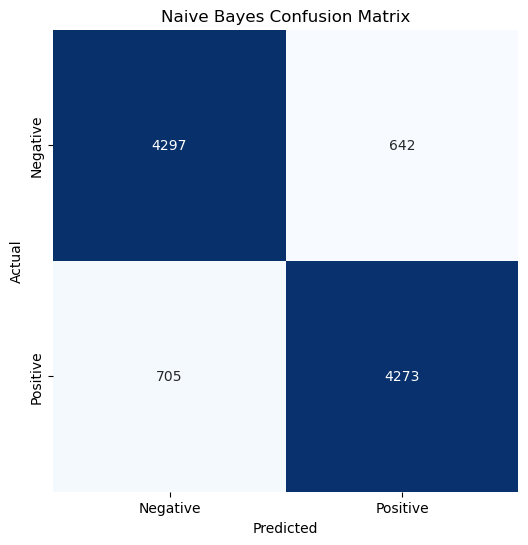

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
# Initialiser et entraîner le modèle Naive Bayes Multinomial
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Prédictions sur l'ensemble de test
y_pred_nb = nb_model.predict(X_test_tfidf)

# Évaluer les performances du modèle Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy (Naive Bayes): {accuracy_nb:.2f}')

# Rapport de classification
print('\nClassification Report (Naive Bayes):\n', classification_report(y_test, y_pred_nb))



# Matrice de confusion pour Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)


plot_confusion_matrix(nb_conf_matrix, "Naive Bayes Confusion Matrix")


### Régression Logistique :

Logistic Regression Accuracy: 0.8903902389835636
Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4939
    positive       0.88      0.91      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



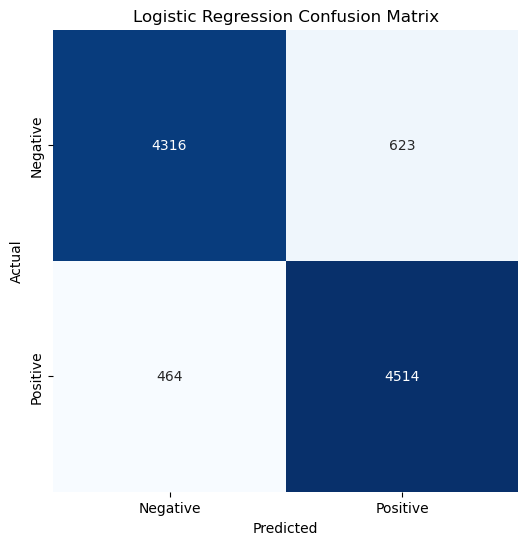

In [20]:
from sklearn.linear_model import LogisticRegression
    
    
# Initialisation du modèle de régression logistique
logistic_model = LogisticRegression()

# Entraînement du modèle
logistic_model.fit(X_train_tfidf, y_train)

# Prédictions sur l'ensemble de test
logistic_predictions = logistic_model.predict(X_test_tfidf)

# Évaluation des performances
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))



# Matrice de confusion pour Logistic Regression
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
plot_confusion_matrix(logistic_conf_matrix, "Logistic Regression Confusion Matrix")


## Sauvegarde de modèle :

In [21]:
# Sauvegarder le modèle Naive Bayes
model_filename_nb = 'sentiment_model_naive_bayes.joblib'
joblib.dump(nb_model, model_filename_nb)
print(f"Modèle Naive Bayes sauvegardé avec succès dans le fichier : {model_filename_nb}")

# Sauvegarder le modèle de Régression Logistique
model_filename_logistic = 'sentiment_model_logistic_regression.joblib'
joblib.dump(logistic_model, model_filename_logistic)
print(f"Modèle de Régression Logistique sauvegardé avec succès dans le fichier : {model_filename_logistic}")


Modèle Naive Bayes sauvegardé avec succès dans le fichier : sentiment_model_naive_bayes.joblib
Modèle de Régression Logistique sauvegardé avec succès dans le fichier : sentiment_model_logistic_regression.joblib


## Interprétation des Résultats :

### Naive Bayes :

- Accuracy: Le modèle a une précision globale de 86%, ce qui est décent.
- Classification Report: Les métriques de précision, rappel et f1-score sont équilibrées pour les classes positive et négative.
- Matrice de Confusion: Le modèle a tendance à avoir plus de faux négatifs que de faux positifs.

### Régression Logistique :

- Accuracy: Le modèle de régression logistique a une précision globale de 89.17%, légèrement supérieure à Naive Bayes.
- Classification Report: Les métriques de précision, rappel et f1-score sont équilibrées pour les deux classes.
- Matrice de Confusion: Le modèle de régression logistique a une performance globale plus élevée avec moins d'erreurs de classification.

### Choix du Modèle :

La régression logistique semble être le choix préférable, car elle a une accuracy légèrement supérieure et des performances globales meilleures, avec moins d'erreurs de classification.


### Testé le modèles sur des exemples réels :

__Positive Reviews:__

The movie was absolutely fantastic! The storyline, characters, 
and visuals were all top-notch. I highly recommend it to everyone.

__Negative Reviews:__

I was very disappointed with this movie. The plot was confusing, 
and the characters were poorly developed. I wouldn't recommend it to anyone.

## Interface de test :

In [22]:
import gradio as gr

# Charger le modèle et le vectorizer
model = joblib.load('sentiment_model_logistic_regression.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Fonction de prédiction
def predict_sentiment(review):
    review = [review]
    review_vectorized = vectorizer.transform(review)
    prediction = model.predict(review_vectorized)
    sentiment = 'Positive' if prediction == 'positive' else 'Negative'
    return sentiment
    
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=[
        gr.Textbox(label="Review", placeholder="Enter a movie review here...")
    ],
    outputs=[
        gr.Textbox(label="Sentiment"),
    ],
    title="Movie Review Sentiment Analysis",
    description="Enter a movie review and the model will predict whether the sentiment is positive or negative."
)

iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
